Copyright (C) 2025  Diarmuid

This program is free software: you can redistribute it and/or modify\
it under the terms of the GNU General Public License as published by\
the Free Software Foundation, either version 3 of the License, or\
(at your option) any later version.

This program is distributed in the hope that it will be useful,\
but WITHOUT ANY WARRANTY; without even the implied warranty of\
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the\
GNU General Public License for more details.

You should have received a copy of the GNU General Public License\
along with this program.  If not, see <https://www.gnu.org/licenses/>.

----------------------------------------------------------------------

Author: Diarmuid O'Neill\
Student Number: C00282898\
Date: 04/11/2025\
Brief Description:\
This project aims to investigate if sleep and lifestyle factors can \
predict the presence of sleep disorders. The full dataset has 374  
entries. See Technical Specification for more information. \
This notebooks uses Gaussian Naieve Bayes to ...

Standard Imports

In [14]:
%matplotlib inline
import pandas as pd
import matplotlib. pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [8]:
dataset = pd.read_csv("Sleep_Health_and_Lifestyle_Dataset.csv")

Gaussian Naieve Bayes

[nan 'Sleep Apnea' 'Insomnia']


Text(0.5, 1.0, 'Naieve Bayes: Stress Level vs Sleep Quality')

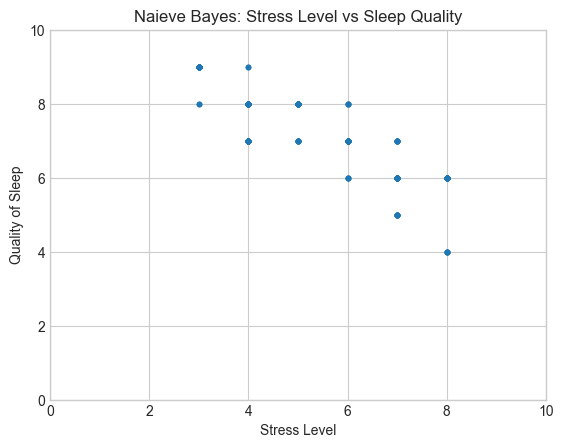

In [22]:
x=dataset[["Stress Level"]]
y=dataset[["Quality of Sleep"]]

print(dataset["Sleep Disorder"].unique())

z = dataset["Sleep Disorder"]
labels = []
for disorder in z:
    if disorder == "nan": # Dark blue
        labels.append(0) 
    elif disorder == "Sleep Apnea": # Light blue
        labels.append(1)
    else:
        labels.append(2)

plt.ylim(0,10)
plt.xlim(0, 10)
plt.scatter(x, y, s=10)
plt.xlabel("Stress Level")
plt.ylabel("Quality of Sleep")
plt.title("Naieve Bayes: Stress Level vs Sleep Quality")